## 使用KNN分类器(k-d树版本)判断乳腺肿瘤是否为良性

In [76]:
import numpy as np

### 准备数据

In [77]:
# 加载数据集
X = np.genfromtxt('wdbc.data', delimiter=',', usecols=range(2, 32))
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [78]:
y = np.genfromtxt('wdbc.data', delimiter=',', usecols=1, dtype=np.str)
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [79]:
y = np.where(y == 'B', 1, 0)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### 模型训练与测试

In [80]:
from kd_tree import KDTree
from sklearn.model_selection import train_test_split

In [81]:
# 邻居个数设置为 3
clf = KDTree(3)

In [82]:
# 将数据集分为训练集和测试集(7:3开)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_test, y_train, y_test

(array([[2.073e+01, 3.112e+01, 1.357e+02, ..., 1.659e-01, 2.868e-01,
         8.218e-02],
        [1.959e+01, 1.815e+01, 1.307e+02, ..., 2.247e-01, 3.643e-01,
         9.223e-02],
        [2.137e+01, 1.510e+01, 1.413e+02, ..., 1.966e-01, 2.730e-01,
         8.666e-02],
        ...,
        [1.919e+01, 1.594e+01, 1.263e+02, ..., 1.777e-01, 2.443e-01,
         6.251e-02],
        [1.088e+01, 1.562e+01, 7.041e+01, ..., 7.966e-02, 2.581e-01,
         1.080e-01],
        [1.231e+01, 1.652e+01, 7.919e+01, ..., 8.660e-02, 2.618e-01,
         7.609e-02]]),
 array([[1.729e+01, 2.213e+01, 1.144e+02, ..., 1.528e-01, 3.067e-01,
         7.484e-02],
        [1.227e+01, 2.997e+01, 7.742e+01, ..., 0.000e+00, 2.409e-01,
         6.743e-02],
        [1.218e+01, 1.784e+01, 7.779e+01, ..., 5.882e-02, 2.227e-01,
         7.376e-02],
        ...,
        [1.171e+01, 1.719e+01, 7.468e+01, ..., 1.099e-01, 2.572e-01,
         7.097e-02],
        [2.034e+01, 2.151e+01, 1.359e+02, ..., 2.685e-01, 5.558e-01,
   

In [83]:
clf.train(X_train, y_train)

In [84]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('准确率为 {:.4%}'.format(accuracy))

准确率为 92.3977%


In [85]:
# 50次测试
# 这里未对X各个特征进行归一化处理,可能会导致预测准确率偏低
def test(X, y, k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    clf = KDTree(k)
    clf.train(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

accuracy_mean = np.mean([test(X, y, 3) for _ in range(50)])
print('平均准确率为 {:.4%}'.format(accuracy))

平均准确率为 92.3977%


In [89]:
# 对X各个特征进行归一化处理试试看
from sklearn.preprocessing import MinMaxScaler

def test_norm(X, y, k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    mms = MinMaxScaler()
    X_train_norm = mms.fit_transform(X_train)
    X_test_norm = mms.transform(X_test)

    clf = KDTree(k)
    clf.train(X_train_norm, y_train)
    y_pred = clf.predict(X_test_norm)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

accuracy_mean = np.mean([test_norm(X, y, 3) for _ in range(50)])
print('归一化后平均准确率为 {:.4%}'.format(accuracy))

归一化后平均准确率为 92.3977%


In [87]:
# 再来考察取不同的 k 值(20以内奇数),预测准确率变化情况
K = list(range(1, 20, 2))
K

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [95]:
acc_array = [[test_norm(X, y, k) for _ in range(50)] for k in K]
ret = np.mean(acc_array, axis=1)
ret

array([0.95157895, 0.96538012, 0.96608187, 0.96573099, 0.96502924,
       0.96748538, 0.96280702, 0.96479532, 0.96105263, 0.95836257])

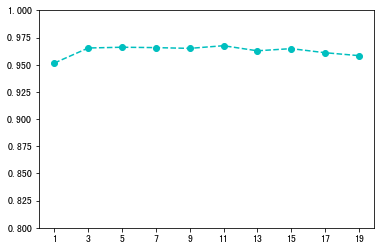

In [110]:
import matplotlib.pyplot as plt
plt.xticks(np.arange(1, 20, 2))
plt.ylim(0.8, 1)
plt.plot(K, ret, 'oc--')

可以发现,对于当前这个分类问题,不同 k 对模型性能影响不大